<a href="https://colab.research.google.com/github/AntonioGarciaGarvi/C.-elegans-alive-dead-classification-using-deep-learning/blob/main/CelegansLifespanDemoTR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Clone the github repo and import necessary libraries

In [ ]:
! git clone https://github.com/AntonioGarciaGarvi/Celegans-Lifespan-Automation-Using-Deep-Learning 
!pip install einops
%cd Celegans-Lifespan-Automation-Using-Deep-Learning/Demo_files/
import os
import cnn_transformer_model
import utils_lifespan_demo
import torch
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np

Cloning into 'Celegans-Lifespan-Automation-Using-Deep-Learning'...
remote: Enumerating objects: 176, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 176 (delta 0), reused 0 (delta 0), pack-reused 172
Receiving objects: 100% (176/176), 54.75 MiB | 11.79 MiB/s, done.
Resolving deltas: 100% (57/57), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 204.3 kB/s eta 0:00:00
/content/Celegans-Lifespan-Automation-Using-Deep-Learning/Demo_files


# Load trained model and demo dataset

In [ ]:
!wget  --no-check-certificate "https://active-vision.ai2.upv.es/wp-content/uploads/2023/05/models.zip" # download  model
!unzip 'models.zip'

--2023-05-11 16:32:30--  https://active-vision.ai2.upv.es/wp-content/uploads/2023/05/models.zip
Resolving active-vision.ai2.upv.es (active-vision.ai2.upv.es)... 158.42.163.26
Connecting to active-vision.ai2.upv.es (active-vision.ai2.upv.es)|158.42.163.26|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 651632131 (621M) [application/zip]
Saving to: ‘models.zip’

models.zip          100%[===================>] 621.44M  27.8MB/s    in 23s     

2023-05-11 16:32:54 (27.0 MB/s) - ‘models.zip’ saved [651632131/651632131]

Archive:  models.zip
   creating: models/
  inflating: models/CelegansDetection_FasterRCNN.pth  
  inflating: models/lifespanCNN_TR.pth  


In [ ]:
nw = cnn_transformer_model.CNN_Transformer(seq_length=57,img_size=256, kernel_s_layer_1=5, kernel_s=5, max1=3, max2=4, max3=2,out_channels_1=4, out_channels_2=8, out_channels_final=16, 
                                   dim=1024, depth=2, heads=8, mlp_dim=2048, dim_head=64, dropout=0, emb_dropout=0)
nw.load_state_dict(torch.load('/content/Celegans-Lifespan-Automation-Using-Deep-Learning/Demo_files/models/lifespanCNN_TR.pth'))
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
nw.to(device)
# Load synthetic images generated in the detecion and domain change step
testdir = '/content/Celegans-Lifespan-Automation-Using-Deep-Learning/Demo_files/Lifespan_demo_imgs/'
data_transform = transforms.ToTensor()
data_test = utils_lifespan_demo.LifespanDatasetTest(root_dir=testdir, seq_length=57,transform=data_transform)
dataloader_test = torch.utils.data.DataLoader(data_test, batch_size=1, shuffle=False, num_workers=0)

# Make predictions and visualize lifespan curve

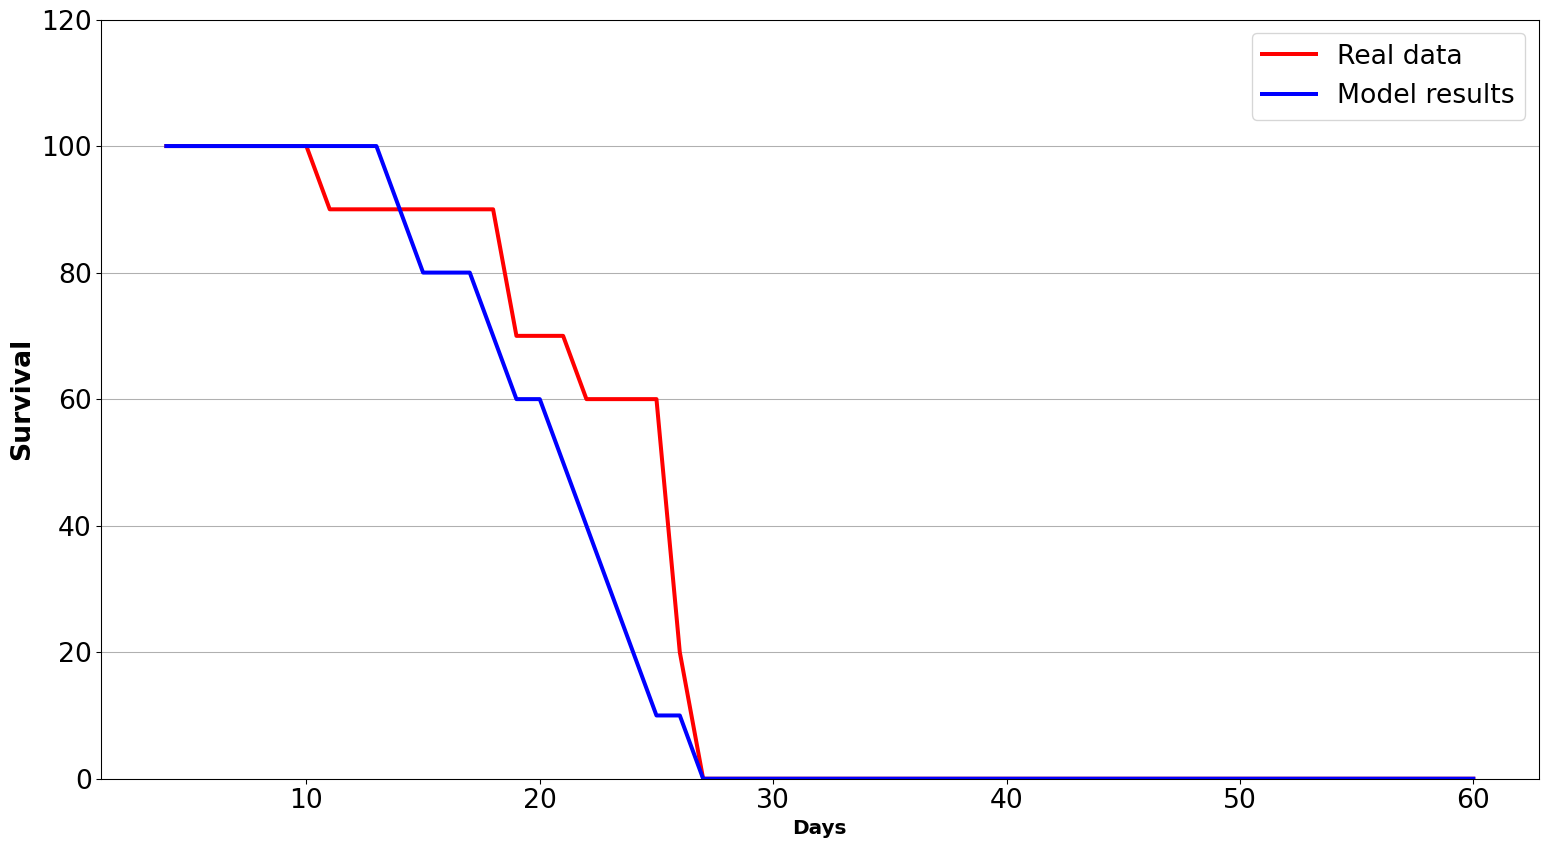

In [ ]:
nw.eval()
with torch.no_grad():
  batch = next(iter(dataloader_test))
  current_batch = batch[0].cuda()
  current_labels = batch[1].cuda()
  pre = nw(current_batch)
  pre = utils_lifespan_demo.post_process_filter2(current_labels[0], pre[0], filter_limit=True, filter_correction=True,mlife=14)
  utils_lifespan_demo.plot_real_model_curves(current_labels[0], pre)